## 哔哩哔哩1亿用户数据可视化分析

- DateRange: 2022-06 ~ 2022-11
- Dataset: [kaggle bilibili-user dataset](https://www.kaggle.com/datasets/beats0/bilibili-user)
- Code: [kaggle bilibili-user-analysis](https://www.kaggle.com/code/beats0/bilibili-user-analysis)
- [bilibili-user-analysis.ipynb](https://github.com/Beats0/bilibili-user-analysis/blob/master/bilibili-user-analysis.ipynb)

1. 有效数据分析
2. 等级统计
3. 性别统计
4. 关注统计
5. 粉丝统计
6. 会员统计
7. 硬核会员统计
8. TOP50统计
9. 签名关键词

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import wordcloud
import jieba.analyse
from matplotlib.font_manager import FontProperties
import matplotlib.font_manager as font_manager


pd.set_option('max_columns',50) 
pd.set_option('max_row',50) 
pd.set_option('display.float_format', lambda x: '%.5f' % x)

font_path = '../input/fontset/pingfang-jian.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True,labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', weight='400', size=12)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

# kaggle 内存溢出导致失败，只统计前n行
# datas = pd.read_csv("../input/bilibili-user/User.csv")
datas = pd.read_csv("../input/bilibili-user/User.csv", nrows=30000000)

colnames = datas.columns
datas["sign"] = datas["sign"].fillna(value="")
# 过滤 level > 0
datas2 = datas[datas['level'] > 0]
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000000 entries, 0 to 29999999
Data columns (total 14 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   uid         int64 
 1   name        object
 2   avatar      object
 3   level       int64 
 4   sex         object
 5   sign        object
 6   vip_type    int64 
 7   vip_status  int64 
 8   vip_role    int64 
 9   archive     int64 
 10  fans        int64 
 11  friend      int64 
 12  like_num    int64 
 13  is_senior   int64 
dtypes: int64(10), object(4)
memory usage: 3.1+ GB


#### 字段说明

|  字段名  | 类型  | 含义  |
|  ---- | ----  | ----  |
| uid           | Number  | uid |
| name          | String  | 用户名 |
| level         | Number  | 用户等级 [0,1,2,3,4,5,6] |
| sex           | String  | 性别 ['男', '女', '保密'] |
| avatar        | String  | 头像 |
| sign          | String  | 用户签名 |
| vip_type      | Number  | 会员类型（已过期不为0, 0为从来不是会员) 0：无 1：月度大会员  2：年度及以上大会员|
| vip_status    | Number  | 状态码 0：无 1：有 |
| vip_role      | Number  | 会员类型 0：无 1：月度大会员 3：年度大会员 7：十年大会员 15：百年大会员 |
| archive       | Number  | 用户稿件数 |
| fans          | Number  | 粉丝数 |
| friend        | Number  | 关注数 |
| like_num      | Number  | 获赞数 |
| is_senior     | Number  | 是否为硬核会员 0：否 1：是  |

In [2]:
datas.head()

,uid,name,avatar,level,sex,sign,vip_type,vip_status,vip_role,archive,fans,friend,like_num,is_senior
0,1,bishi,http://i0.hdslb.com/bfs/face/34c5b30a990c7ce4a...,4,男,,2,1,3,2,168616,5,88666,0
1,2,碧诗,http://i2.hdslb.com/bfs/face/ef0457addb24141e1...,6,男,https://kami.im 直男过气网红 # av362830 “We Are Star...,2,1,7,39,1014905,254,3359792,1
2,3,囧囧倉,http://i0.hdslb.com/bfs/face/d4de6a84557eea8f1...,5,男,富强、民主、文明、和谐、自由、平等、公正、法治、爱国、敬业、诚信、友善。,0,0,0,9,10729,195,13629,0
3,4,枢木朱雀,http://i1.hdslb.com/bfs/face/c1358db2321a01105...,5,保密,,2,1,3,0,4502,72,3434,0
4,5,幻想乡,http://i2.hdslb.com/bfs/face/9ea006b9a8c00453e...,6,男,,2,1,3,0,6767,18,12248,0


### 1.有效数据分析

#### 状态码统计

In [3]:
# datas['code'].value_counts()

### 2.等级统计

In [4]:
key = 'level'
datas[key].value_counts().sort_index(ascending=True)

0    13230566
1      927971
2     3075564
3     2278429
4     2577448
5     5743410
6     2166612
Name: level, dtype: int64

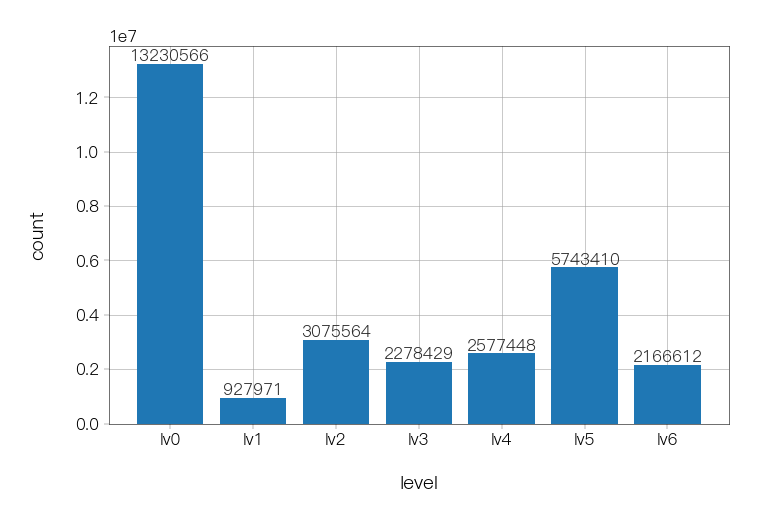

In [5]:
key = 'level'

x = np.arange(7)
xticks = ['lv' + str(i) for i in x]

y = list(datas[key].value_counts().sort_index(ascending=True))
plt.bar(x,y,zorder=10)
plt.xlabel(key, )
plt.xticks(x, xticks)
plt.ylabel('count')
for x, y in zip(x, y):
    plt.text(x , y, '%d' % y, ha='center', va='bottom')
plt.show()

#### 随uid增长分组等级分布统计

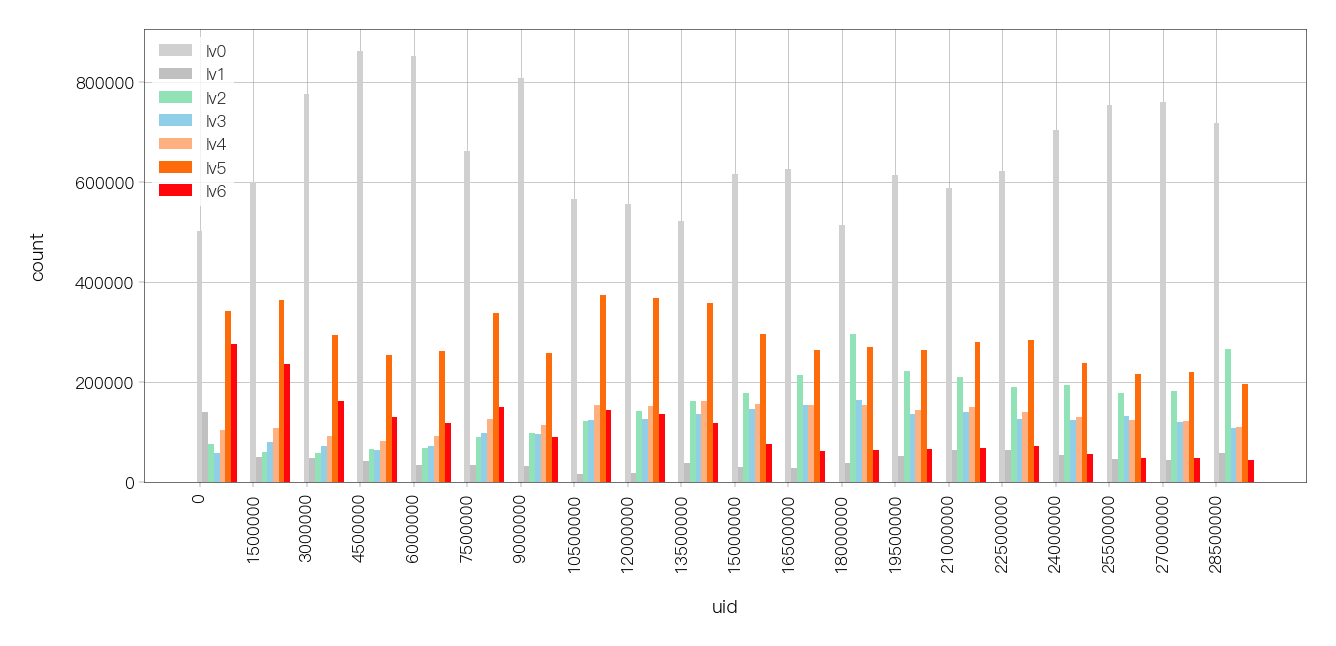

In [6]:
key = 'level'
max = datas['uid'].max()
n = 20
bar_width = 160000

x = list(np.linspace(0, max, num=n, dtype=int,endpoint=False))
l = np.arange(7)
x.append(max)

sizes = [ [] for _ in range(7) ]
colors = ['#D0D0D0','#C0C0C0','#91E2B7','#90CFE7', '#FFB080', '#FE6B0A', '#FF050C']

j = 0
for x1 in x:
    if(j+1 <= n):
        d = datas[(datas['uid'] >= x[j] ) & (datas['uid'] <= x[j+1] )]
        for l1 in l:
            sizes[l1].append(d[d[key] == l1].shape[0])
    j = j+1

x.pop()

plt.figure(figsize=(15, 6))
for l1 in l:
    c = colors[l1]
    lb = label="lv"+str(l1)
    plt.bar(x + (l1 * bar_width), sizes[l1], width=bar_width, zorder=10, label=lb, color=c,align="center")

plt.xticks(x, x, rotation=90)
plt.xlabel('uid')
plt.ylabel('count')
plt.legend(fontsize = 12)
plt.show()

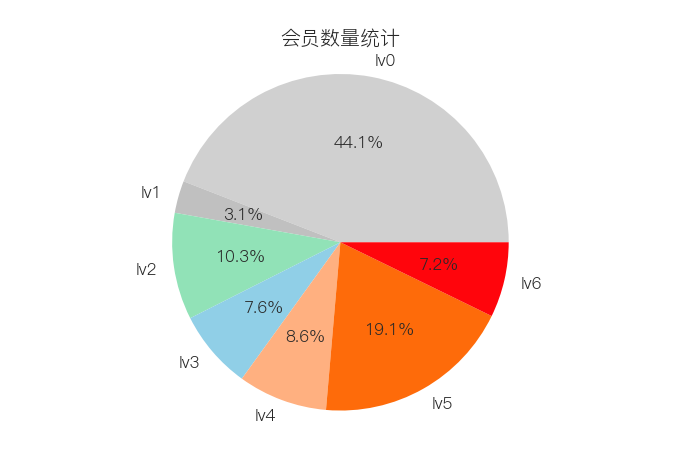

In [7]:
key = 'level'
key_name = '会员数量统计'

labels = np.arange(7)
names = []
colors = ['#D0D0D0','#C0C0C0','#91E2B7','#90CFE7', '#FFB080', '#FE6B0A', '#FF050C']

sizes = []
for label in labels:
    sizes.append(datas[datas[key] == label].shape[0])
    names.append('lv' + str(label))

plt.pie(sizes,labels=names,colors=colors,autopct='%1.1f%%',)
plt.axis('equal')
plt.title(key_name)
plt.show()

### 3.性别统计

保密    23416894
男      3691531
女      2891396
Name: sex, dtype: int64


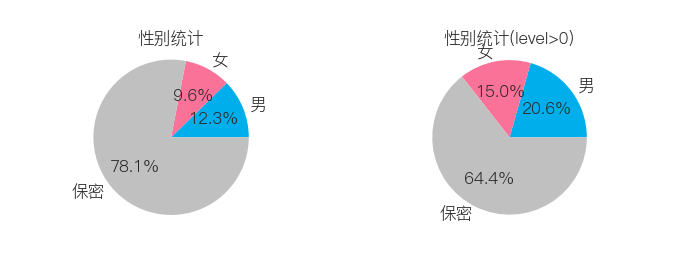

In [8]:
key = 'sex'
key_name = '性别统计'
key_name2 = '性别统计(level>0)'

labels = ['男','女','保密']
colors = ['#00AEEC','#FB7299','#C0C0C0']

sizes = []
for label in labels:
    sizes.append(datas[datas[key] == label].shape[0])
print(datas[key].value_counts())
plt.subplot(221)
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',)
plt.title(key_name, size=12)
plt.axis('equal')


plt.subplot(222)
s2 = []
for label in labels:
    s2.append(datas2[datas2[key] == label].shape[0])
plt.pie(s2,labels=labels,colors=colors,autopct='%1.1f%%',)
plt.title(key_name2, size=12)
plt.axis('equal')
plt.show()

### 4.关注统计

#### 设置最大关注数为2000

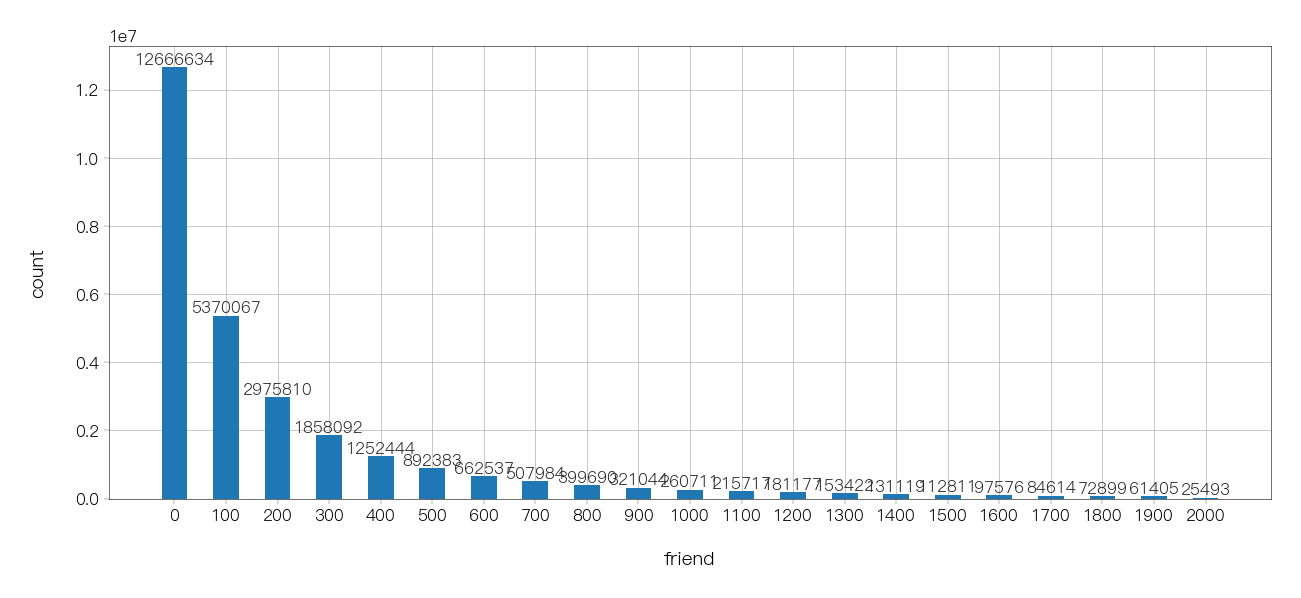

In [9]:
key = 'friend'
max = 2000
n = 20
x = list(np.linspace(0, max, num=n, dtype=int,endpoint=False))
x.append(max)
xticks = [str(i) for i in x]
y = []

for x1 in x:
    y1 = 0
    if(x1 == 0):
        y1 = datas[datas[key] == 0].shape[0]
    else:
        y1 = datas[datas[key] >= x1].shape[0]
    y.append(y1)

plt.figure(figsize=(15, 6))
plt.bar(x, y, width=50, zorder=10)
plt.xticks(x, x)
plt.xlabel(key)
plt.ylabel('count')
for x, y in zip(x, y):
    plt.text(x , y, '%d' % y, ha='center', va='bottom')
plt.show()

### 5.粉丝统计


In [10]:
fans_range = [10000, 100000, 500000, 1000000, 3000000, 5000000, 10000000, 15000000, 20000000]
fans_range_labels = ["1w", "10w","50w", "100w", "300w", "500w", "1000w", "1500w"]


datas["fans_range"] = pd.cut(datas['fans'], 
                bins=fans_range,
                labels=fans_range_labels, 
                right=False)

t = datas.groupby("fans_range")["fans"].apply(lambda s: s.describe()).unstack(0)
t.style.background_gradient()


fans_range,1w,10w,50w,100w,300w,500w,1000w,1500w
count,26338.000000,3589.000000,550.000000,320.000000,45.000000,32.000000,1.000000,1.000000
mean,27725.846571,208830.499861,695341.367273,1589622.528125,3770736.377778,6921126.875000,11352762.000000,17240488.000000
std,19963.941346,100266.901318,140544.868319,470571.241807,568582.979364,1296103.692951,nan,nan
min,10000.000000,100086.000000,500643.000000,1000166.000000,3003609.000000,5008028.000000,11352762.000000,17240488.000000
25%,13358.000000,127469.000000,574862.000000,1227126.000000,3260596.000000,5879499.750000,11352762.000000,17240488.000000
50%,19729.000000,174893.000000,664592.500000,1440729.000000,3632721.000000,6751450.500000,11352762.000000,17240488.000000
75%,34760.500000,265406.000000,803977.500000,1866935.250000,4334668.000000,7719347.250000,11352762.000000,17240488.000000
max,99860.000000,498853.000000,996633.000000,2947573.000000,4898141.000000,9608617.000000,11352762.000000,17240488.000000


### 6. 会员统计

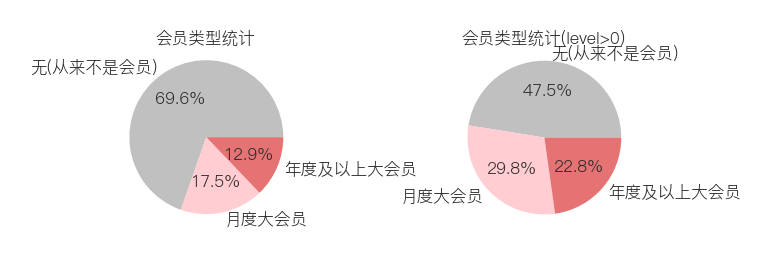

In [11]:
key = 'vip_type'
key_name = '会员类型统计'
key_name2 = '会员类型统计(level>0)'

labels = [0,1,2]
names = ['无(从来不是会员)','月度大会员','年度及以上大会员']
colors = ['#C0C0C0','#FFCDD2','#E57373']

sizes = []
for label in labels:
    sizes.append(datas[datas[key] == label].shape[0])
plt.subplot(221)
plt.pie(sizes,labels=names,colors=colors,autopct='%1.1f%%',)
plt.axis('equal')
plt.title(key_name, size=12)

s2 = []
for label in labels:
    s2.append(datas2[datas2[key] == label].shape[0])
plt.subplot(222)
plt.pie(s2,labels=names,colors=colors,autopct='%1.1f%%',)
plt.axis('equal')
plt.title(key_name2,size=12)

plt.show()

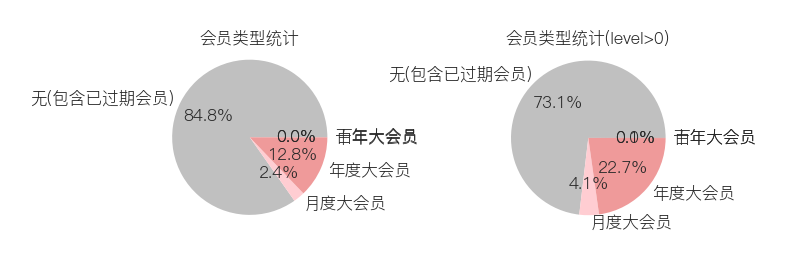

In [12]:
key = 'vip_role'
key_name = '会员类型统计'


labels = [0,1,3,7,15]
names = ['无(包含已过期会员)','月度大会员','年度大会员', '十年大会员', '百年大会员']
colors = ['#C0C0C0','#FFCDD2','#EF9A9A', '#E57373', '#B71C1C']

sizes = []
for label in labels:
    sizes.append(datas[datas[key] == label].shape[0])
plt.subplot(221)
plt.pie(sizes,labels=names,colors=colors,autopct='%1.1f%%',)
plt.axis('equal')
plt.title(key_name, size=12)

s2 = []
for label in labels:
    s2.append(datas2[datas2[key] == label].shape[0])
plt.subplot(222)
plt.pie(s2,labels=names,colors=colors,autopct='%1.1f%%',)
plt.axis('equal')
plt.title(key_name2, size=12)
plt.show()

### 7. 硬核会员统计

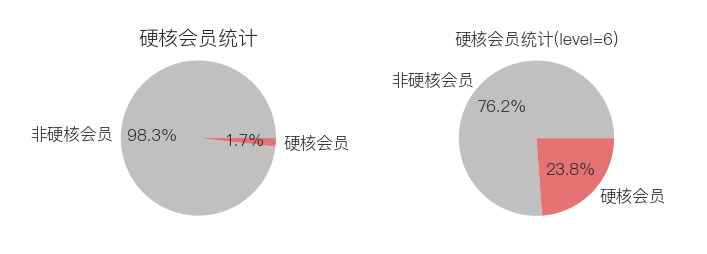

In [13]:
key = 'is_senior'
key_name = '硬核会员统计'
key_name2 = '硬核会员统计(level=6)'

labels = [0,1]
names = ['非硬核会员', '硬核会员']
colors = ['#C0C0C0','#E57373']

sizes = []
for label in labels:
    sizes.append(datas[datas[key] == label].shape[0])
plt.subplot(221)
plt.pie(sizes,labels=names,colors=colors,autopct='%1.1f%%',)
plt.axis('equal')
plt.title(key_name)

s2 = []
d = datas2[datas2['level'] == 6]
for label in labels:
    s2.append(d[d[key] == label].shape[0])
plt.subplot(222)
plt.pie(s2,labels=names,colors=colors,autopct='%1.1f%%',)
plt.axis('equal')
plt.title(key_name2, size=12)
plt.show()

### 8. TOP50统计

In [14]:
datas.nlargest(50, 'fans')

,uid,name,avatar,level,sex,sign,vip_type,vip_status,vip_role,archive,fans,friend,like_num,is_senior,fans_range
546194,546195,老番茄,http://i0.hdslb.com/bfs/face/bc5ca101313d4db22...,6,男,新浪微博：_老番茄_,2,1,3,414,17240488,1,127912606,0,1500w
9617618,9617619,哔哩哔哩直播,http://i0.hdslb.com/bfs/face/8f6a614a48a3813d9...,6,保密,哔哩哔哩直播官方账号。问题请访问bilibili.com/v/customer-service,1,0,0,782,11352762,2000,26601486,0,1000w
18202104,18202105,绵羊料理,http://i1.hdslb.com/bfs/face/54b5c9c2ad7f1baff...,6,女,你减肥路上的绊脚石！合作QQ：212926668,2,1,3,335,9608617,139,60747063,0,500w
20165628,20165629,共青团中央,http://i1.hdslb.com/bfs/face/20e470d5529821be7...,6,保密,你好呀！这里皮皮团，等你很久啦！,2,1,3,3843,9587354,113,207685537,0,500w
9824765,9824766,敬汉卿,http://i0.hdslb.com/bfs/face/fd8d7ad17af295f7c...,6,男,YouTube：敬汉卿【官方频道】 商务合作联系1905387728@qq.com,1,0,0,1181,9282980,92,92275178,0,500w
927586,927587,木鱼水心,http://i2.hdslb.com/bfs/face/e922d9dc09a2d21f1...,6,男,公众号：木鱼水心 影评某种程度上，是让看过这部片的人，不那么孤独的东西。商务邮箱/QQ：bd...,2,1,3,1181,8800407,70,51851142,0,500w
14110779,14110780,凉风Kaze,http://i1.hdslb.com/bfs/face/e0cc906bb531195e9...,6,保密,喜欢请关注~不喜欢的话我再想想办法~\n微博：@凉风Kaze \n阅片无数系列每周三晚22点...,2,1,3,650,8202482,22,128984253,1,500w
562196,562197,中国BOY超级大猩猩,http://i0.hdslb.com/bfs/face/ffb50dd4e712386eb...,6,男,新浪 @中国BOY-Hans,2,1,3,1524,8191905,115,76901753,0,500w
19577965,19577966,李子柒,http://i2.hdslb.com/bfs/face/82d27965dae3b2fe9...,6,女,李家有女，人称子柒。 新浪微博：李子柒 邮箱：liziqistyle@163.com,1,0,0,143,7806759,1,14031102,0,500w
5970159,5970160,小潮院长,http://i1.hdslb.com/bfs/face/834eb0de8d2f470bf...,6,男,微博@小潮院长哈哈哈 商务合作请联系QQ2284771898,2,1,7,269,7734495,99,81889557,1,500w


### 9. 签名关键词

In [15]:
texts = ';'.join(datas['sign'].tolist())
cut_text = " ".join(jieba.cut(texts))
keywords = jieba.analyse.extract_tags(cut_text, topK=100, withWeight=True, allowPOS=('n','a','nr','ns', 'nw', 'nz'))
text_cloud = dict(keywords)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.162 seconds.
Prefix dict has been built successfully.


(-0.5, 1199.5, 499.5, -0.5)

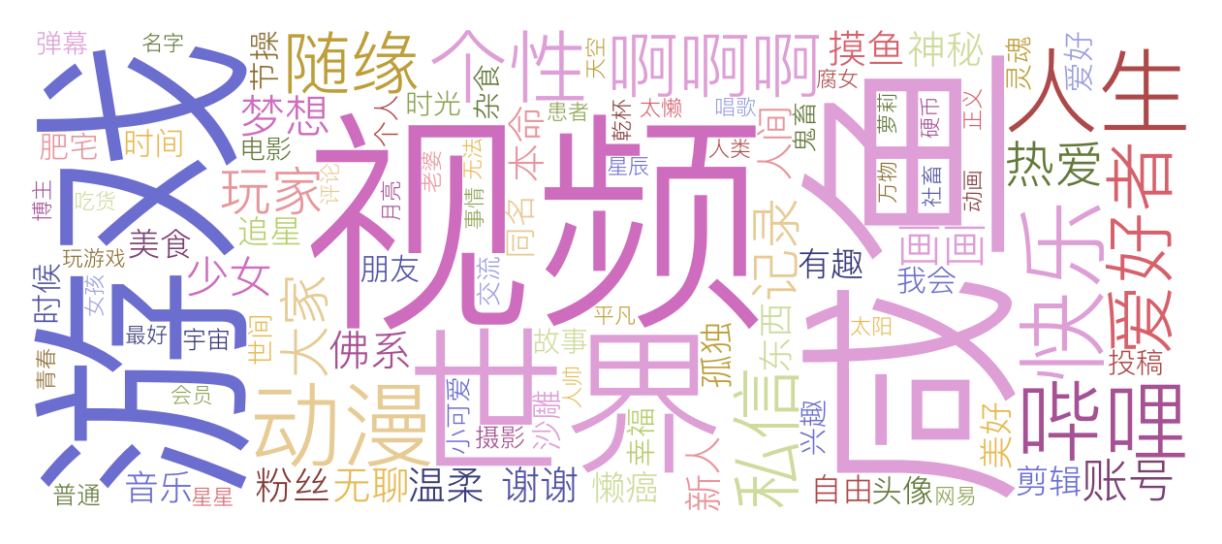

In [16]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         font_path=font_path,
                         colormap="tab20b").generate(" ".join(text_cloud))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")